# Imports

In [8]:
import os
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pydub import AudioSegment
import wave
import math

# Loading data

In [9]:
main_directory = os.getcwd() + "\\..\\datasets\\jp2\\wavs\\"
audio_lengths = []

files = [f for f in os.listdir(main_directory) if os.path.isfile(os.path.join(main_directory, f))]
for f in files:
    audio = AudioSegment.from_file(main_directory + f)
    audio_lengths.append(audio.duration_seconds)

In [10]:
data = pd.DataFrame(audio_lengths, columns=["Length"])
data.head()

,Length
0,2.740907
1,9.269887
2,13.648889
3,12.783900
4,14.349887


In [11]:
data["Length"].describe()

count    390.000000
mean       7.024480
std        3.381595
min        1.103900
25%        3.917392
50%        6.609909
75%        9.622404
max       15.590884
Name: Length, dtype: float64

# Dataset length (s)

In [12]:
data_audio = data["Length"].sum()
data_audio_formatted = '{} hours {} minutes {} seconds'.format(
    math.floor(data_audio / 3600), 
    math.floor((data_audio % 3600) / 60),
    round((data_audio % 3600) % 60, 1))
print("Total dataset length:", data_audio_formatted)

Total dataset length: 0 hours 45 minutes 39.5 seconds


Text(0.5, 1.0, 'Histogram of audio file lengths in jp2 dataset')

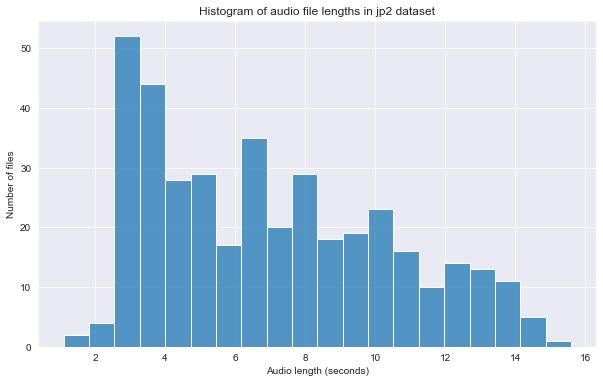

In [13]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(data["Length"], bins=20, kde=False)
plt.xlabel("Audio length (seconds)")
plt.ylabel("Number of files")
plt.title("Histogram of audio file lengths in jp2 dataset")

# Sample file characteristics

Text(0.5, 1.0, 'Sample audio plot')

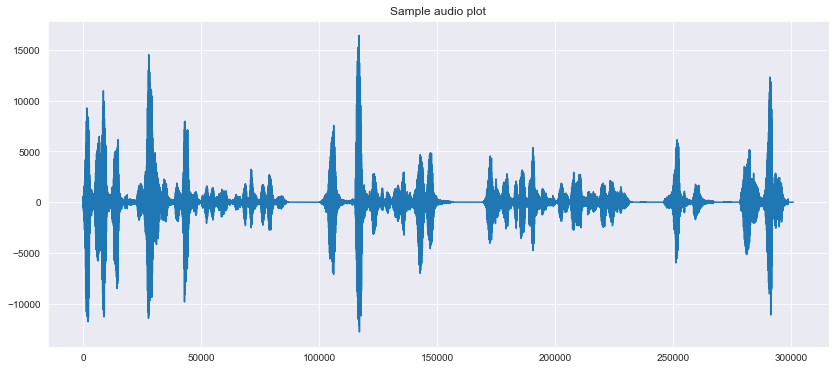

In [14]:
file_name = main_directory + "JP2-0003.wav"
audio_file = wave.open(file_name, "r")
signal = audio_file.readframes(-1)
signal = np.frombuffer(signal, dtype=np.int16)
plt.figure(figsize=(14, 6))
sns.lineplot(data=signal)
plt.title("Sample audio plot")